In [28]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
def init_lattice(n):
    '''Create a nxn lattice with random spin configuration'''
    
    lattice = np.random.choice([1, -1], size=(n, n))
    return lattice


In [3]:
def E(state):
  energy = 0
  n=len(state)
  for i in range(n):
    for j in range(n):
      energy+= -J*(state[i][j]*state[i][(j+1)%n] + state[i][j]*state[(i+1)%n][j])
  return energy

In [4]:
def dE_(state,index,J):
  i,j =index
  n=len(state)
  return 2*J*(state[i][j]*state[i][(j+1)%n] + state[i][j]*state[(i+1)%n][j] + (state[i][j]*state[i][(j-1)%n] + state[i][j]*state[(i-1)%n][j])) 

In [23]:
def iter(lattice,energy,spin,J,T):
    n=len(lattice)
    i = np.random.randint(n)
    j = np.random.randint(n)

    dE = dE_(lattice,[i,j],J)

    if dE < 0 or np.random.random() < np.exp(-dE/T):
        lattice[i, j] = -lattice[i, j]
        energy += dE
        # Note that the spin is collected at every step
        spin += 2*lattice[i, j] 
    return lattice,spin,energy


In [24]:
def M(state):
    Mag = np.sum(state)
    
    return Mag

In [25]:
def ising(n=200, 
          nsteps=500000,
          H=0,
          J=1,
          T=1):

    '''Ising Model Simulator'''
    
    lattice = init_lattice(n)
    energy = 0
    energies = []
    spins = []
    spin = np.sum(lattice)
    
    for step in tqdm(range(nsteps)):
        lattice,spin,energy=iter(lattice,energy,spin,J,T)
        energies.append(energy)
        spins.append(spin)

    return lattice, energies, spins


100%|██████████| 3/3 [00:18<00:00,  6.22s/it]


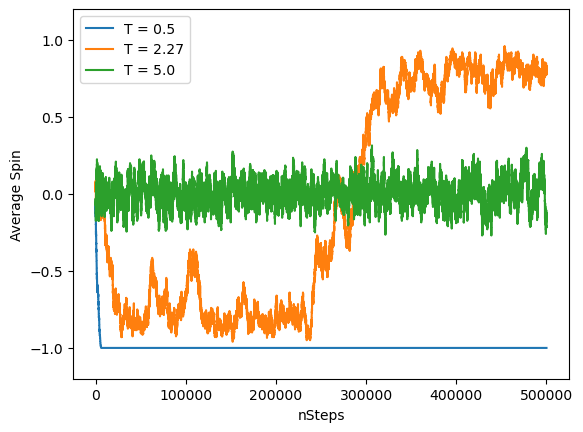

In [32]:
temperatures = [0.5, 2.27, 5.0]

for T in tqdm(temperatures):
    lattice, energies, spins = ising(n=20, nsteps = 500000, T=T)
    spins = np.array(spins) / 20. ** 2
    plt.plot(range(len(spins)), spins, label = 'T = {0}'.format(T))
plt.legend(loc = 'best')
plt.xlabel('nSteps')
plt.ylabel('Average Spin')
plt.ylim(-1.2, 1.2)
plt.savefig('images/average-spin.png')
plt.show()

100%|██████████| 3/3 [00:23<00:00,  7.85s/it]


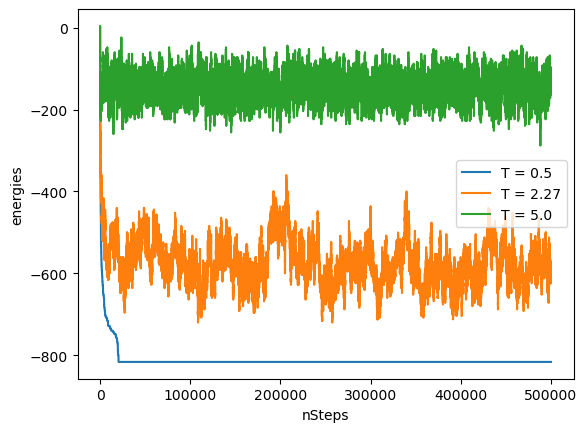

In [34]:
temperatures = [0.5, 2.27, 5.0]

for T in tqdm(temperatures):
    lattice, energies, spins = ising(n=20, nsteps = 500000, T=T)
    spins = np.array(spins) / 20. ** 2
    plt.plot(range(len(energies)), energies, label = 'T = {0}'.format(T))
plt.legend(loc = 'best')
plt.xlabel('nSteps')
plt.ylabel('energies')
plt.savefig('images/energies.png')
plt.show()

100%|██████████| 50/50 [09:51<00:00, 11.84s/it]


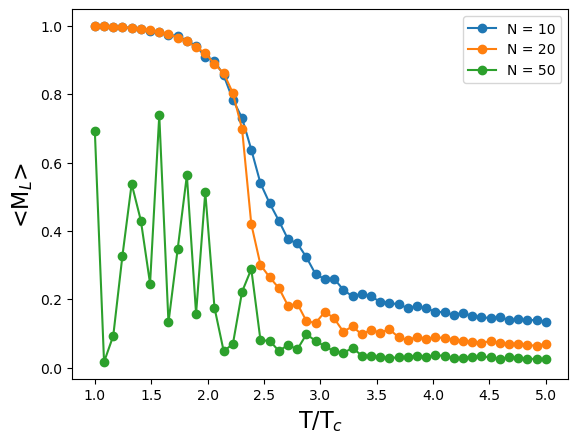

In [38]:
Ts = np.linspace(1, 5, 50) 
N=Ns = [10, 20, 50]
for i in Ns:
    avgspins = []
    for T in tqdm(Ts):
        lattice, energies, spins = ising(n=i, nsteps=500000, T=T)
        spins = spins[int(len(spins)/2):]
        avgspin = np.sum(np.abs(spins)) / i ** 2 / len(spins)
        avgspins.append(avgspin)
    plt.plot(Ts, avgspins, 'o-', label = 'N = {0}'.format(i))

plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('<M$_{L}$>', fontsize = 16)
plt.legend()
plt.savefig('images/magnetization.png')
plt.show()

100%|██████████| 50/50 [06:27<00:00,  7.74s/it]


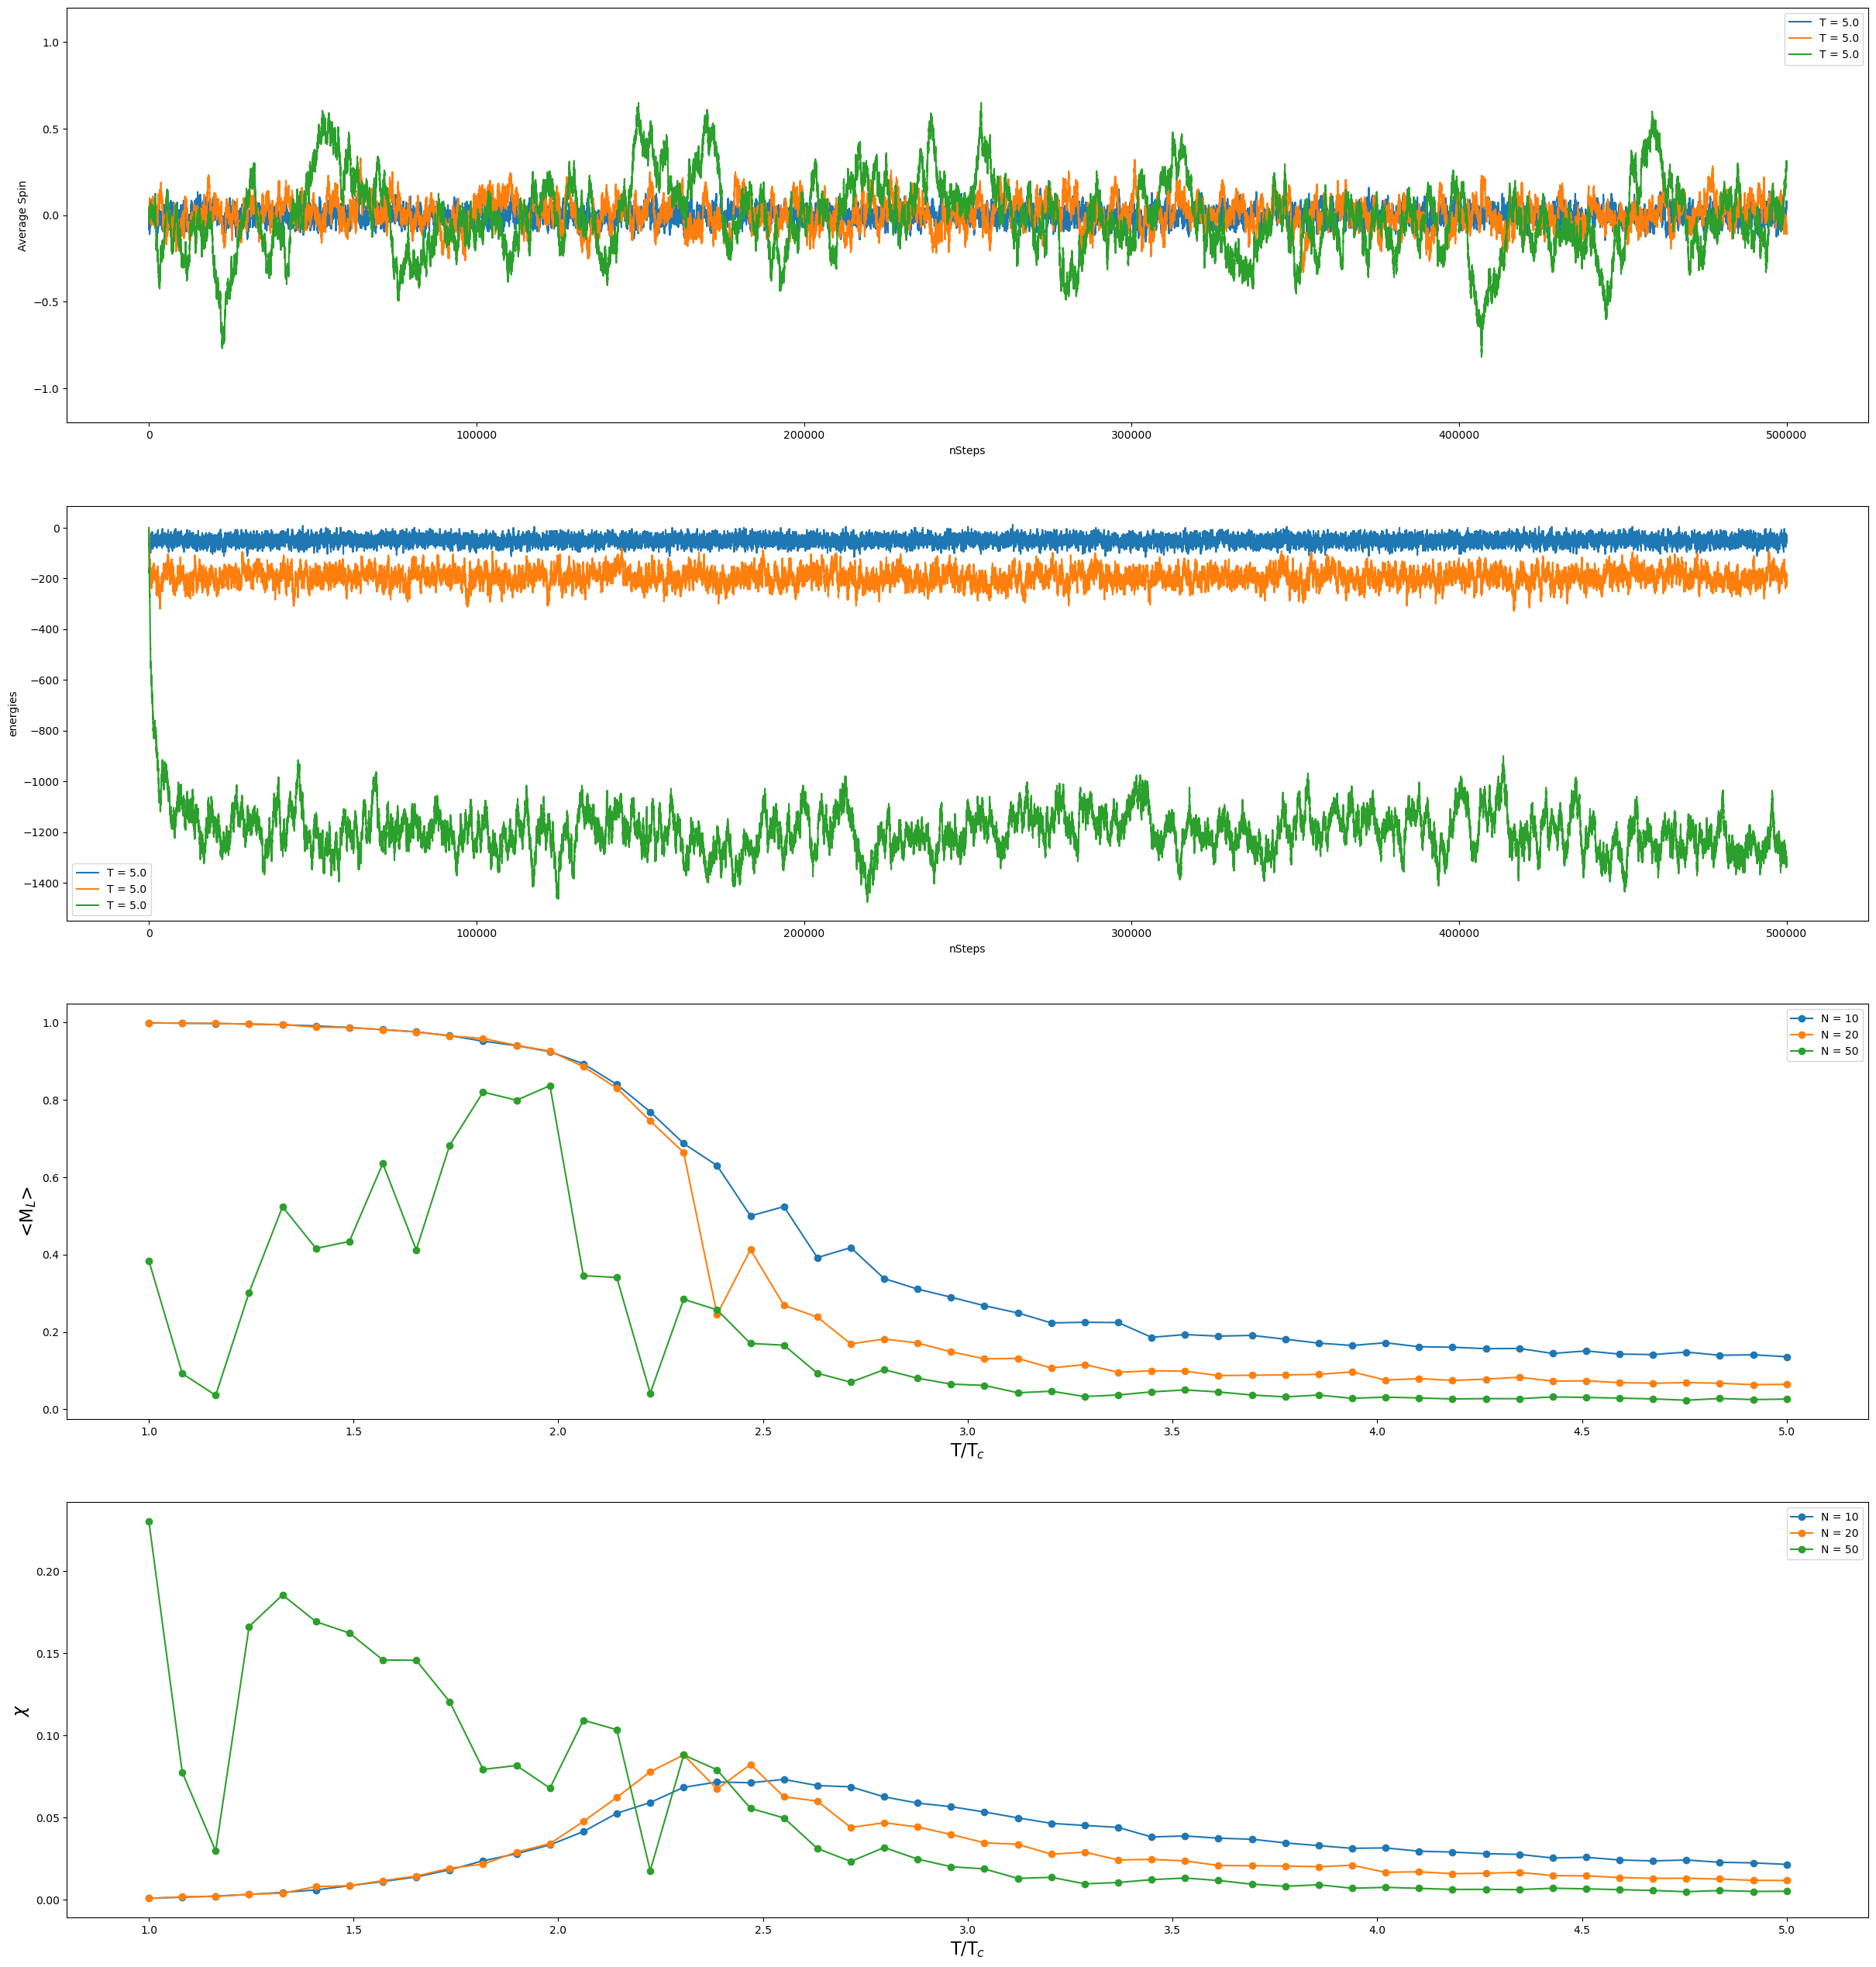

In [46]:
Ts = np.linspace(1, 5, 50) 
N=Ns = [10, 20, 50]
plt.figure(figsize=(30, 8*4))
for i in Ns:
    Energy=[]
    avgspins = []
    Xs = []
    for T in tqdm(Ts):
        lattice, energies, spins = ising(n=i, nsteps=500000, T=T)
        Energy.append(np.mean(energies[int(len(spins)/2):]))
        spins_h = np.array(spins) / 20. ** 2
        spins = spins[int(len(spins)/2):]
        avgspin = np.sum(np.abs(spins)) / i ** 2 / len(spins)
        X =  np.abs(np.sum(((np.abs(spins) / i ** 2) ** 2)) / len(spins) - avgspin) / T
        avgspins.append(avgspin)
        Xs.append(X)
    plt.subplot(4,1,1)
    plt.plot(range(len(spins_h)), spins_h, label = 'T = {0}'.format(T))
    plt.subplot(4,1,2)
    plt.plot(range(len(energies)), energies, label = 'T = {0}'.format(T))
    plt.subplot(4,1,3)
    plt.plot(Ts, avgspins, 'o-', label = 'N = {0}'.format(i))
    plt.subplot(4,1,4)
    plt.plot(Ts, Xs, 'o-', label = 'N = {0}'.format(i))
plt.subplot(4,1,1)
plt.legend(loc = 'best')
plt.xlabel('nSteps')
plt.ylabel('Average Spin')
plt.ylim(-1.2, 1.2)
plt.subplot(4,1,2)
plt.legend(loc = 'best')
plt.xlabel('nSteps')
plt.ylabel('energies')
plt.subplot(4,1,3)
plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('<M$_{L}$>', fontsize = 16)
plt.legend()
plt.subplot(4,1,4)
plt.xlabel('T/T$_{c}$', fontsize = 16)
plt.ylabel('$\chi$', fontsize = 16)
plt.legend()
plt.savefig('images/ising_graphs.png')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a=np.load('sim.npy')
for data in a:
    plt.figure(figsize=(30, 8))
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.plot(data)

In [ ]:
a=np.load('sim2.npy')
for data in a:
    plt.figure(figsize=(30, 8))
    plt.xlabel('Time')
    plt.ylabel('Energy')
    plt.plot(data)

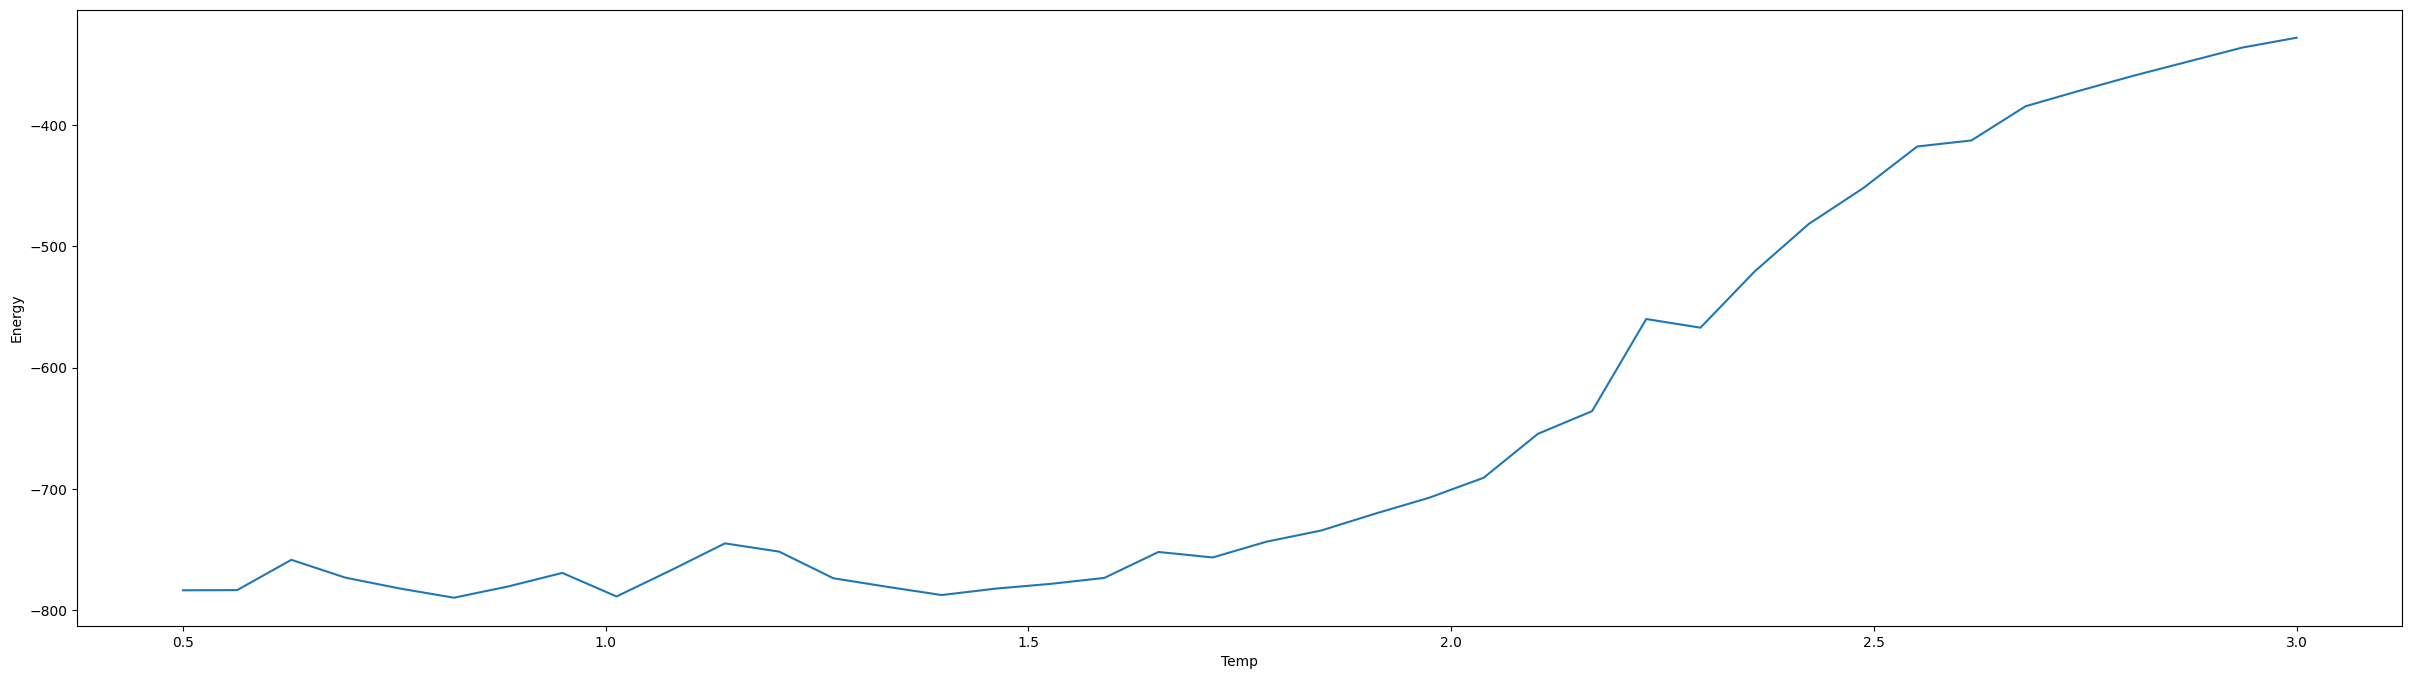

In [10]:
a=np.load('sim3.npy')
plt.figure(figsize=(30, 8))
plt.xlabel('Temp')
plt.ylabel('Energy')
plt.plot(np.linspace(0.5, 3, 40),a)

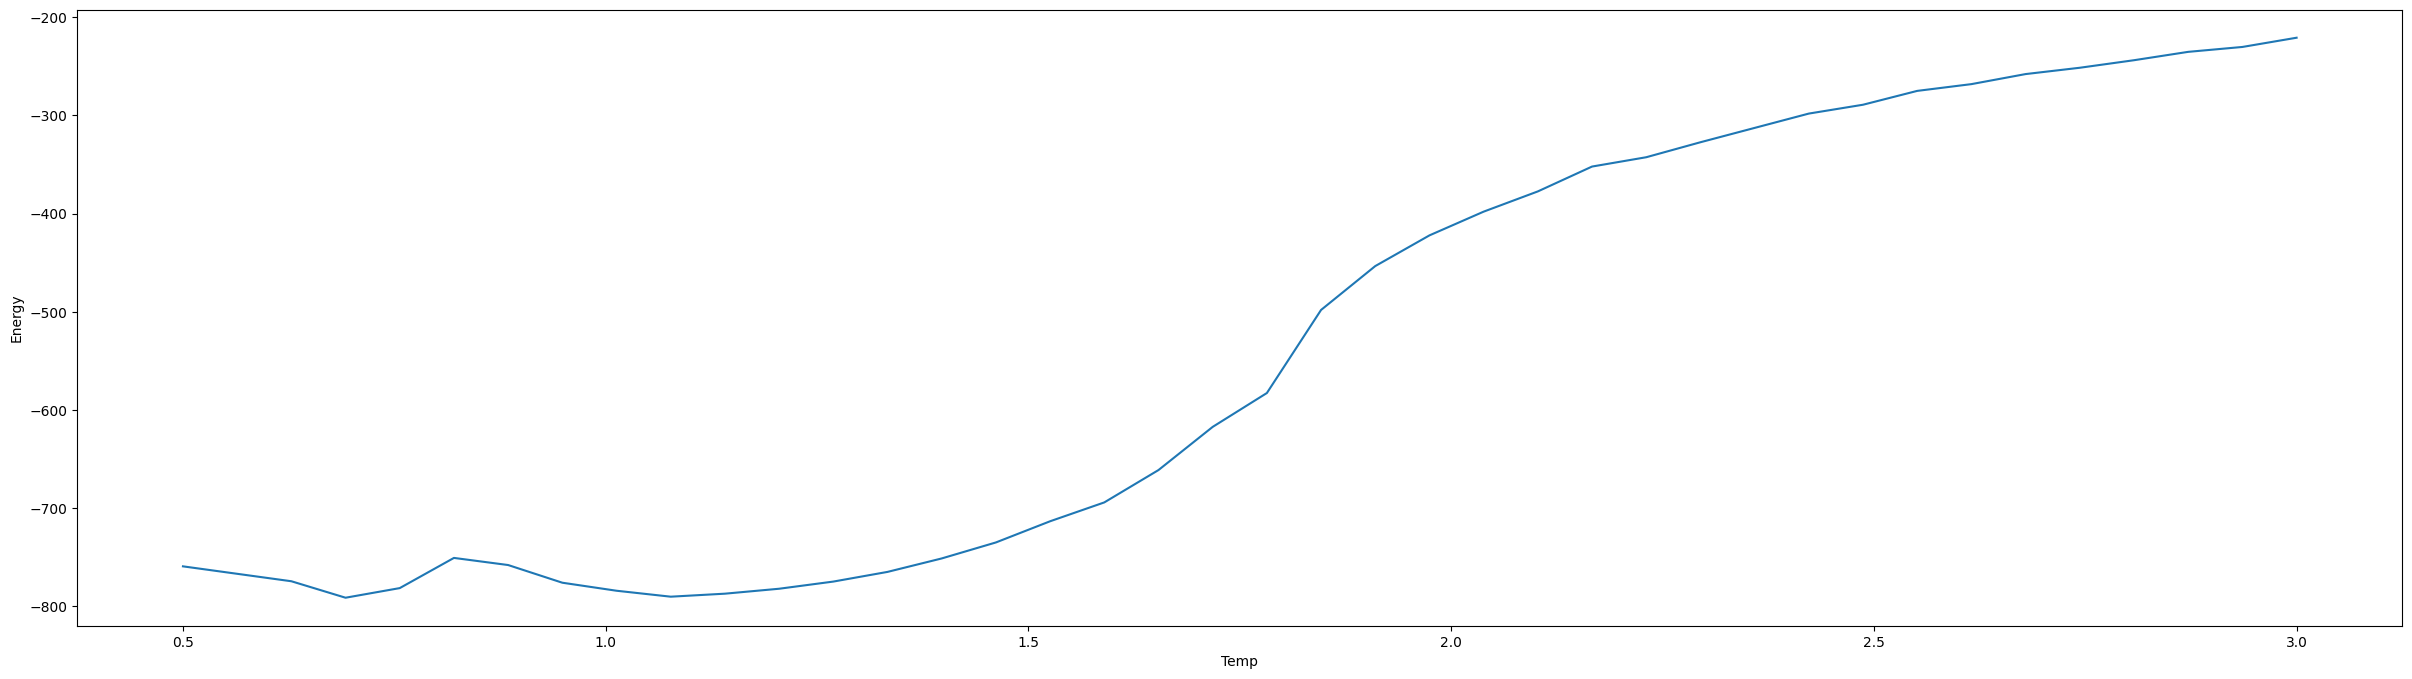

In [11]:
a=np.load('sim3E.npy')
plt.figure(figsize=(30, 8))
plt.xlabel('Temp')
plt.ylabel('Energy')
plt.plot(np.linspace(0.5, 3, 40),a)

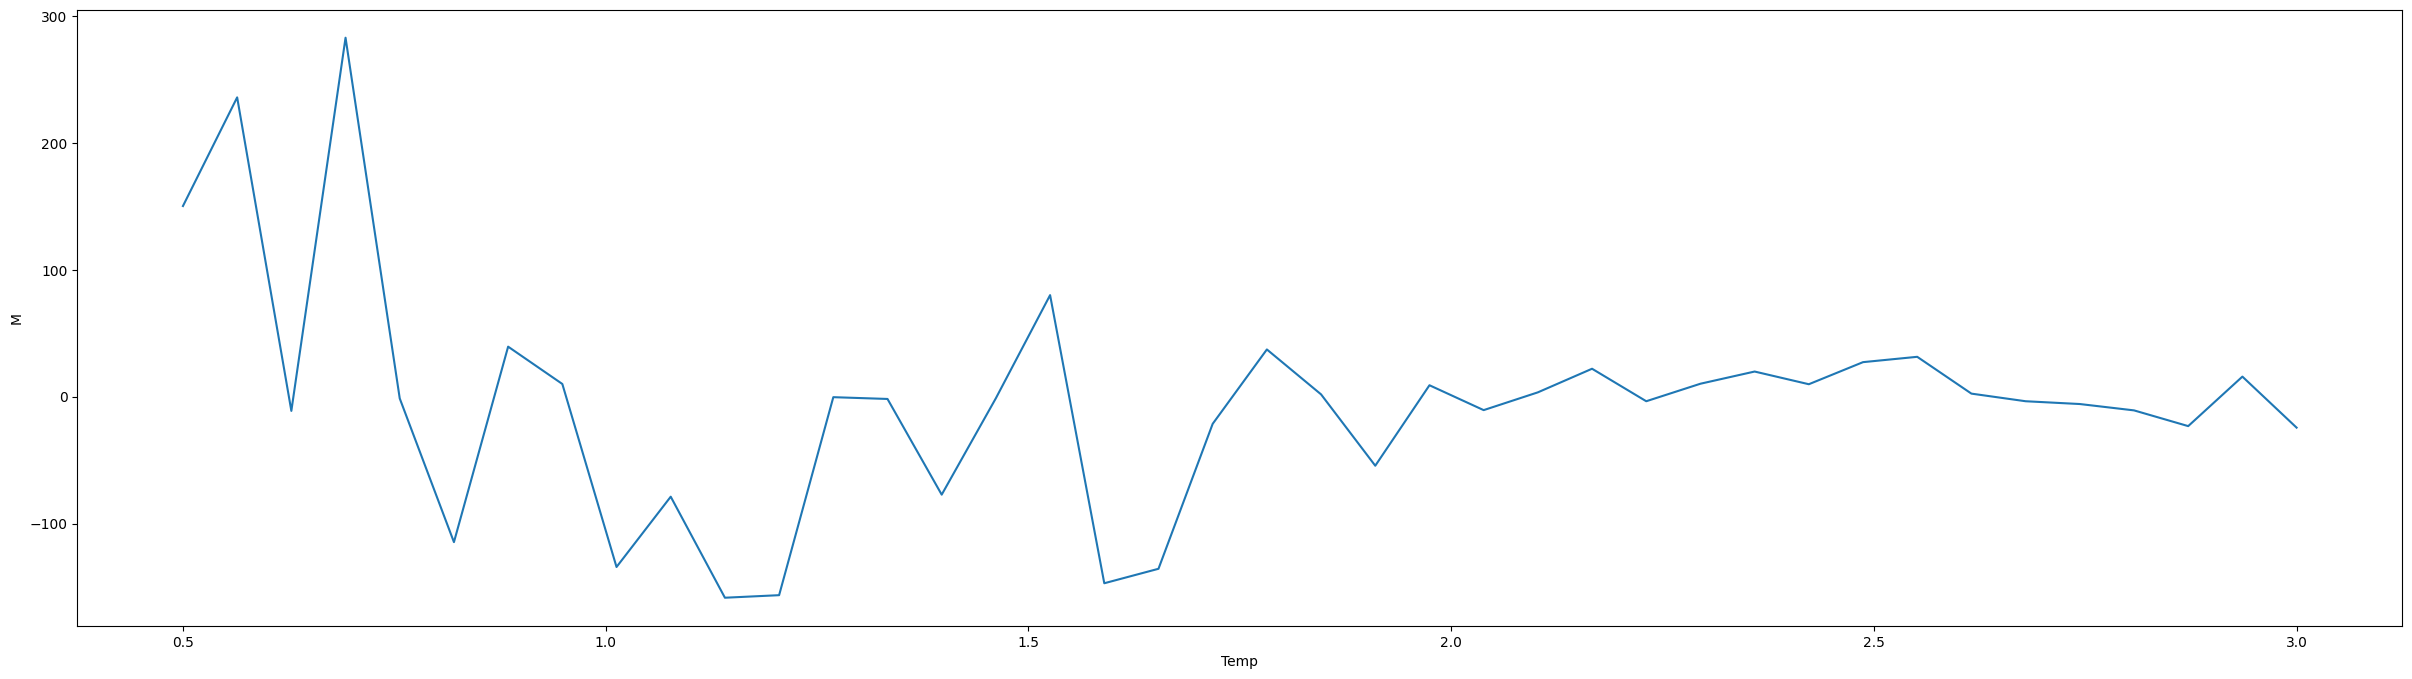

In [12]:
a=np.load('sim3M.npy')
plt.figure(figsize=(30, 8))
plt.xlabel('Temp')
plt.ylabel('M')
plt.plot(np.linspace(0.5, 3, 40),a)